# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (9):

(component kg in one M^3 concrete)(7):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

(Measurements)(2)
* SLUMP (cm)
* FLOW (cm)

Target variable (1):
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from plotnine import *


import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)


#%matplotlib inline
#%matplotlib notebook

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")


pd.options.display.max_rows = 150
pd.options.display.max_columns = 100

# Loading data

In [2]:
df = pd.read_csv ('cement_slump.csv')

# EDA and Graphical analysis

In [3]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [5]:
df.isnull().sum()

Cement                                0
Slag                                  0
Fly ash                               0
Water                                 0
SP                                    0
Coarse Aggr.                          0
Fine Aggr.                            0
SLUMP(cm)                             0
FLOW(cm)                              0
Compressive Strength (28-day)(Mpa)    0
dtype: int64

In [7]:
df.corr()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Cement,1.000,-0.244,-0.487,0.221,-0.106,-0.310,0.057,0.146,0.186,0.446
Slag,-0.244,1.000,-0.323,-0.027,0.307,-0.224,-0.184,-0.284,-0.327,-0.332
Fly ash,-0.487,-0.323,1.000,-0.241,-0.144,0.173,-0.283,-0.119,-0.055,0.444
Water,0.221,-0.027,-0.241,1.000,-0.155,-0.602,0.115,0.467,0.632,-0.254
SP,-0.106,0.307,-0.144,-0.155,1.000,-0.104,0.058,-0.213,-0.176,-0.038
Coarse Aggr.,-0.310,-0.224,0.173,-0.602,-0.104,1.000,-0.489,-0.188,-0.326,-0.161
Fine Aggr.,0.057,-0.184,-0.283,0.115,0.058,-0.489,1.000,0.202,0.190,-0.155
SLUMP(cm),0.146,-0.284,-0.119,0.467,-0.213,-0.188,0.202,1.000,0.906,-0.223
FLOW(cm),0.186,-0.327,-0.055,0.632,-0.176,-0.326,0.190,0.906,1.000,-0.124
Compressive Strength (28-day)(Mpa),0.446,-0.332,0.444,-0.254,-0.038,-0.161,-0.155,-0.223,-0.124,1.000


<AxesSubplot:>

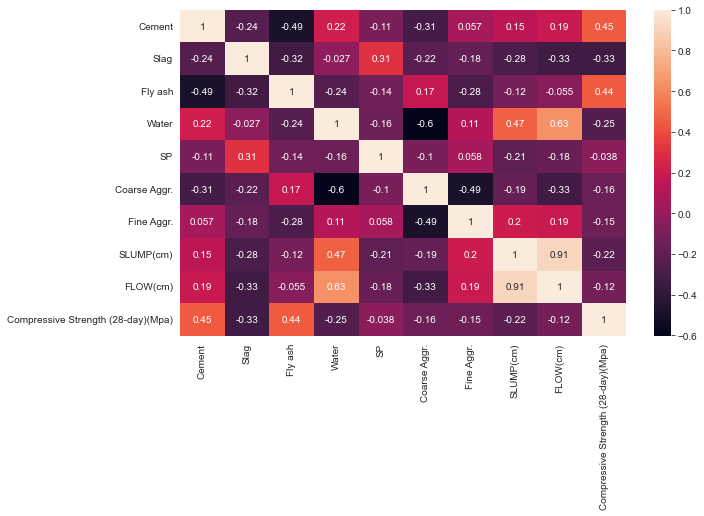

In [9]:
sns.heatmap(df.corr(), annot = True)

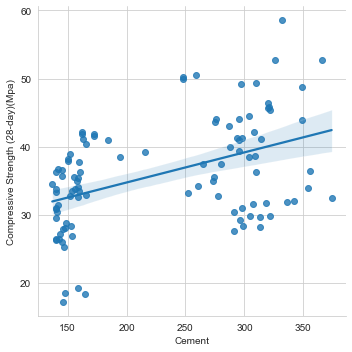

In [21]:
sns.lmplot( x= 'Cement', y ='Compressive Strength (28-day)(Mpa)', data=df)

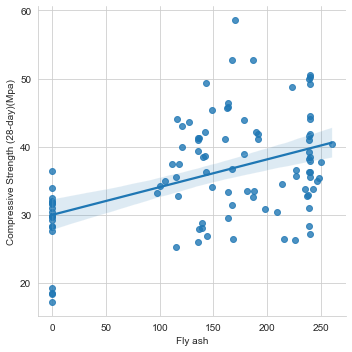

In [20]:
sns.lmplot( x= 'Fly ash', y ='Compressive Strength (28-day)(Mpa)', data=df)

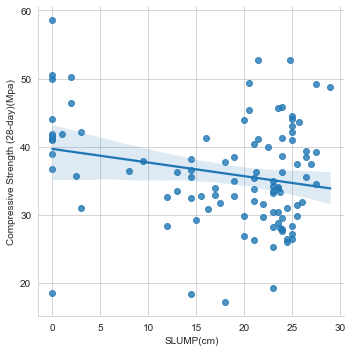

In [18]:
sns.lmplot( x= 'SLUMP(cm)', y ='Compressive Strength (28-day)(Mpa)', data=df)

# Data Preprocessing 

### Features and target variable

In [22]:
X = df[['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.', 'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)']]

In [23]:
y = df['Compressive Strength (28-day)(Mpa)']

### Splitting data into training and testing

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [26]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (82, 9)
Train target shape   :  (82,)
Test features shape  :  (21, 9)
Test target shape    :  (21,)


## Scaling

In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()

In [28]:
scaler.fit(X_train) 

StandardScaler()

In [29]:
X_train_scaled = scaler.transform(X_train) 
X_train_scaled

array([[-8.15245573e-01,  1.11638869e+00,  4.59738503e-01,
        -8.83000381e-01,  3.86264482e+00, -5.35074582e-01,
         2.29081067e-02, -1.66603219e+00, -1.58181087e+00],
       [-1.10706235e+00, -6.54730645e-01,  1.00370650e+00,
        -1.27667814e+00, -1.10418967e+00,  1.91796192e+00,
        -5.30461286e-01,  6.33311085e-01,  1.91726194e-01],
       [ 1.20605412e+00,  7.04500471e-01, -1.84213053e+00,
         4.46301139e-01,  9.19335490e-01, -4.41447234e-01,
         2.77158909e-01,  4.65066456e-01, -8.51186159e-03],
       [ 1.46038985e+00, -1.42358865e+00,  2.17436499e-01,
        -1.85441303e+00, -9.20232840e-01,  1.90537361e-01,
         9.95043526e-01, -2.00252144e+00, -1.66762718e+00],
       [ 8.58015766e-01,  1.89640200e-01, -3.76203410e-01,
        -4.22857547e-01,  1.83508158e-01,  2.37351035e-01,
        -6.50108722e-01,  8.01555715e-01,  6.78018614e-01],
       [-1.09501487e+00, -1.41329144e+00,  6.95982957e-01,
        -3.81955962e-01, -1.43531197e+00,  1.315235

In [30]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.7750873 ,  1.15071271, -1.84213053, -0.72961944,  1.28724916,
         1.63005783, -0.15656305, -0.37615669, -1.66762718],
       [-0.80185948,  1.1335507 ,  0.4718536 , -0.8318734 ,  1.28724916,
        -0.47655749,  0.09768775, -2.00252144, -1.66762718],
       [ 1.51393421,  0.87612056, -1.84213053,  1.31545982, -0.92023284,
        -1.49475489,  0.71088087,  0.9137188 ,  0.84965123],
       [-1.10840096, -1.35150821,  0.7735196 , -0.12120836, -1.39852061,
         1.94019842, -0.43923012,  0.74547417,  0.44917512],
       [ 1.08290209, -1.42015625,  1.06307049,  2.05168836, -0.07403141,
        -1.21270251, -0.36145928,  0.80155571,  1.65060346],
       [ 0.87140186, -1.42358865, -0.37620341, -0.98525434, -0.55231917,
         0.28416471,  1.33902991,  0.521148  , -0.0371173 ],
       [-1.10304652, -0.3749899 ,  1.0521669 , -0.70405595, -1.03060694,
         1.56802971, -0.86846529,  0.74547417,  0.62080774],
       [ 1.15250976, -1.42358865, -0.12178631,  1.1109519 ,  0

In [31]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8
mean,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [32]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8
mean,0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


##  1. Model Building (Linear Regression)

In [33]:
lm = LinearRegression()

In [35]:
lm.fit(X_train, y_train)

LinearRegression()

In [51]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

### 1.1 Interpret the model

In [36]:
y_pred = lm.predict(X_test_scaled)

### 1.2 Model Evaluation

Text(0, 0.5, 'Y Predictions')

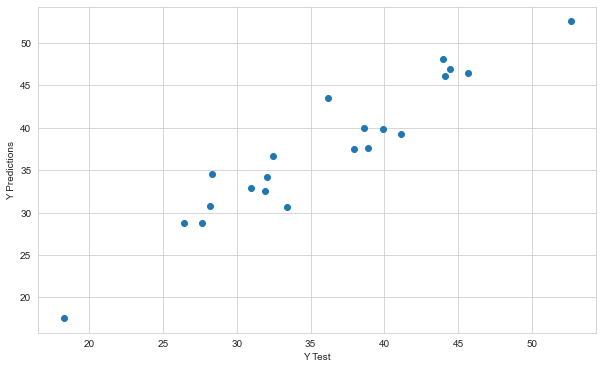

In [57]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Y Predictions')

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [47]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [53]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8656445831399764
MAE 		: 2.214172905420828
MSE 		: 8.358833481786567
RMSE 		: 2.8911647275426158


In [55]:
y_train_pred = lm.predict(X_train_scaled)

In [50]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9114008864799181
MAE 		: 1.9251883798438463
MSE 		: 5.356461247547332
RMSE 		: 2.3144030002459237


In [80]:

def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [81]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.911,0.864
mae,1.906,2.222
mse,5.394,8.458
rmse,2.323,2.908


In [58]:
from sklearn.model_selection import cross_validate

In [59]:
scores = cross_validate(lm, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [82]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.079,0.004,0.925,-1.959,-6.887,-2.624
2,0.104,0.001,0.927,-1.735,-4.268,-2.066
3,0.001,0.001,0.859,-2.309,-7.118,-2.668
4,0.000,0.000,0.724,-2.819,-11.009,-3.318
5,0.000,0.000,0.898,-1.815,-4.889,-2.211


In [62]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                             0.867
test_neg_mean_absolute_error       -2.127
test_neg_mean_squared_error        -6.834
test_neg_root_mean_squared_error   -2.577
dtype: float64

In [66]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8656445831399764
MAE 		: 2.214172905420828
MSE 		: 8.358833481786567
RMSE 		: 2.8911647275426158


In [67]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9114008864799181
MAE 		: 1.9251883798438463
MSE 		: 5.356461247547332
RMSE 		: 2.3144030002459237


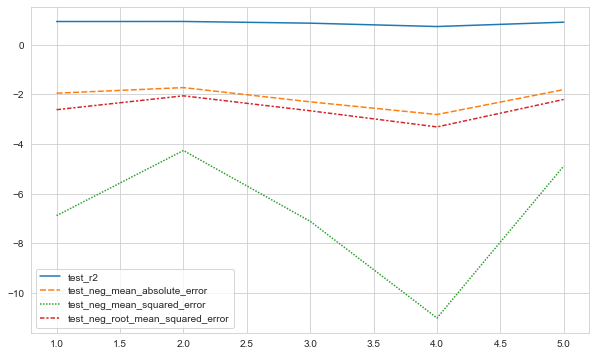

In [63]:
sns.lineplot(data = scores.iloc[:,2:]);

# 2. Regularization

## 2.1 Ridge (Apply and evaluate)

In [68]:
from sklearn.linear_model import Ridge

In [69]:
ridge_model = Ridge(alpha=1, random_state=42)

In [70]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [71]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [75]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.911,0.864
mae,1.906,2.222
mse,5.394,8.458
rmse,2.323,2.908


In [78]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, "linear")

In [84]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.911,0.864,0.911,0.864
mae,1.906,2.222,1.906,2.222
mse,5.394,8.458,5.394,8.458
rmse,2.323,2.908,2.323,2.908


In [85]:
from sklearn.linear_model import RidgeCV

In [86]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [87]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [88]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [89]:
ridge_cv_model.alpha_

0.12

In [90]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [91]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.911,0.865
mae,1.920,2.223
mse,5.358,8.382
rmse,2.315,2.895


In [92]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.911,0.864,0.911,0.864,0.911,0.865
mae,1.906,2.222,1.906,2.222,1.920,2.223
mse,5.394,8.458,5.394,8.458,5.358,8.382
rmse,2.323,2.908,2.323,2.908,2.315,2.895


## 2.2 Lasso (Apply and evalute)

In [93]:
from sklearn.linear_model import Lasso, LassoCV

In [94]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [95]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [96]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.796,0.723
mae,2.808,3.420
mse,12.335,17.224
rmse,3.512,4.150


In [97]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.911,0.864,0.911,0.864,0.911,0.865,0.796,0.723
mae,1.906,2.222,1.906,2.222,1.920,2.223,2.808,3.420
mse,5.394,8.458,5.394,8.458,5.358,8.382,12.335,17.224
rmse,2.323,2.908,2.323,2.908,2.315,2.895,3.512,4.150


In [98]:
model = Lasso(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [100]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.009,0.002,0.727,-4.065,-25.113,-5.011
2,0.002,0.001,0.763,-3.150,-13.938,-3.733
3,0.001,0.001,0.842,-2.358,-7.944,-2.818
4,0.001,0.001,0.734,-2.717,-10.613,-3.258
5,0.001,0.001,0.768,-2.577,-11.156,-3.340


In [101]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                              0.767
test_neg_mean_absolute_error        -2.973
test_neg_mean_squared_error        -13.753
test_neg_root_mean_squared_error    -3.632
dtype: float64

In [102]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.796,0.723
mae,2.808,3.420
mse,12.335,17.224
rmse,3.512,4.150


<AxesSubplot:>

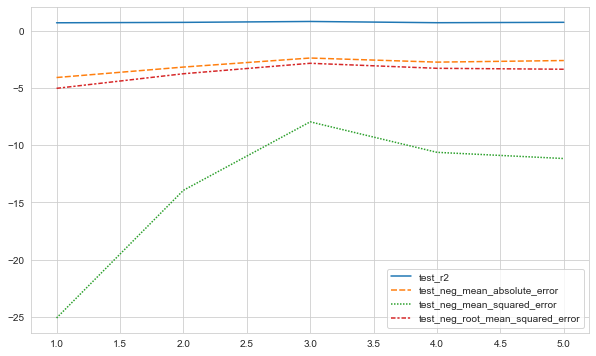

In [103]:
sns.lineplot(data = scores.iloc[:,2:])

In [104]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [105]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42) 

In [106]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=42)

In [107]:
np.where(alpha_space[::-1]==lasso_cv_model.alpha_)

(array([99]),)

In [108]:
alpha_space[::-1]

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01])

In [109]:
y_pred = lasso_cv_model.predict(X_test_scaled)   
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [110]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.911,0.864
mae,1.903,2.250
mse,5.383,8.448
rmse,2.320,2.907


In [111]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.911,0.864,0.911,0.864,0.911,0.865,0.796,0.723,0.911,0.864
mae,1.906,2.222,1.906,2.222,1.920,2.223,2.808,3.420,1.903,2.250
mse,5.394,8.458,5.394,8.458,5.358,8.382,12.335,17.224,5.383,8.448
rmse,2.323,2.908,2.323,2.908,2.315,2.895,3.512,4.150,2.320,2.907


## 2.3 Elastic-Net (Apply and evaluate )
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV

In [112]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [122]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 5, 
                                max_iter = 100000,random_state=42)

In [123]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [124]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [125]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.911,0.864
mae,1.908,2.223
mse,5.382,8.440
rmse,2.320,2.905


In [126]:
pd.concat([ls,rs, rcs, lss, lcs, ecs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_cv_train,elastic_cv_test
R2,0.911,0.864,0.911,0.864,0.911,0.865,0.796,0.723,0.911,0.864,0.911,0.864
mae,1.906,2.222,1.906,2.222,1.920,2.223,2.808,3.420,1.903,2.250,1.908,2.223
mse,5.394,8.458,5.394,8.458,5.358,8.382,12.335,17.224,5.383,8.448,5.382,8.440
rmse,2.323,2.908,2.323,2.908,2.315,2.895,3.512,4.150,2.320,2.907,2.320,2.905


In [127]:
from sklearn.model_selection import GridSearchCV

In [128]:
elastic_model = ElasticNet(max_iter=10000, random_state=42)

In [129]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [130]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [132]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.01,

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [133]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [134]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

,GridSearch_train,GridSearch_test
R2,0.911,0.864
mae,1.908,2.223
mse,5.382,8.440
rmse,2.320,2.905


In [137]:
from sklearn.preprocessing import PolynomialFeatures

In [138]:
polynomial_converter = PolynomialFeatures(degree=5, include_bias=False)

poly_features = polynomial_converter.fit_transform(X)

In [140]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)

In [141]:
final_model = Lasso(alpha=0.01)

In [142]:
final_model.fit(X_scaled, y)

Lasso(alpha=0.01)